# Personal Data

In [ ]:
# Set your student number
student_number = 400211546
Name = 'Danial'
Last_Name = 'Ahangarani'

# Preprocess

Import the libraries

In [1]:
from google.colab import drive
import numpy as np
import pandas as pd
import os
import glob
import warnings
warnings.filterwarnings("ignore")

from PIL import Image
import cv2, random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import torch
import torchvision.transforms as T

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from keras.utils.vis_utils import plot_model
from tensorflow.keras.metrics import *
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *

!pip install opendatasets
import opendatasets as od

!pip install tf-explain
from tf_explain.core.integrated_gradients import IntegratedGradients

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 43 kB 1.4 MB/s 


Mount colab

In [2]:
#Google Drive Aceess
drive.mount('/content/drive')

Mounted at /content/drive


Download dataset

In [3]:
od.download('https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia')
# Needed kaggle username and key to download dataset

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: daniahangarani
Your Kaggle Key: ··········


100%|██████████| 2.29G/2.29G [00:12<00:00, 199MB/s]


In [4]:
train_directory="/content/chest-xray-pneumonia/chest_xray/train"
val_directory="/content/chest-xray-pneumonia/chest_xray/val/"
test_directory="/content/chest-xray-pneumonia/chest_xray/test/"

class_nemes = ['PNEUMONIA', 'NORMAL']

Transformation and data augmentation

In [5]:
train_val_gen = ImageDataGenerator(
    rescale = 1/255,
    shear_range = 10,
    zoom_range = .3,
    horizontal_flip = True,
    vertical_flip = True,
    width_shift_range = .2,
    rotation_range = 20,
    fill_mode = 'nearest'
)

test_gen = ImageDataGenerator(
    rescale = 1/255
)

Load the data

In [6]:
train = train_val_gen.flow_from_directory(train_directory,
                                      batch_size = 32,
                                      class_mode = 'binary'
)

val = train_val_gen.flow_from_directory(val_directory,
                                      batch_size = 2,
                                      class_mode = 'binary'
)

test = test_gen.flow_from_directory(test_directory,
                                   batch_size = 2,
                                   class_mode = 'binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# My Model

Advantages of my model: 
Due to the large number of layers and having residual blocks, derivatives flow or gradients flow are better.
This model does not have gradient exploding and gradient vanishing and because of that it is trained well.
With adding more and different layers we can increase the complexity and keep the gradients flow simultaneously. This prevents the model from exploding.

Building the model

In [ ]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                      patience=10)

In [ ]:
lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                          patience=8)

In [ ]:
My_model = tf.keras.applications.ResNet50V2(weights= None,
                                         include_top=False,
                                         input_shape=(224,224,3))


x = My_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)

pred = tf.keras.layers.Dense(1, activation='sigmoid')(x)
My_model = tf.keras.Model(inputs=My_model.input, outputs=pred)

Compile

In [ ]:
My_model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics = ['accuracy', Precision()])

Fit

In [ ]:
my_history = My_model.fit(train, epochs= 30,
                       validation_data = val,
                       steps_per_epoch= 110,
                       callbacks=[es, lr],
                       batch_size=32)

Epoch 1/30
110/110 [==============================] - 98s 815ms/step - loss: 0.3543 - accuracy: 0.8389 - precision: 0.9048 - val_loss: 20.5591 - val_accuracy: 0.5000 - val_precision: 0.5000 - lr: 0.0010
Epoch 2/30
110/110 [==============================] - 88s 798ms/step - loss: 0.2966 - accuracy: 0.8724 - precision: 0.9340 - val_loss: 2.6601 - val_accuracy: 0.5000 - val_precision: 0.5000 - lr: 0.0010
Epoch 3/30
110/110 [==============================] - 87s 788ms/step - loss: 0.2589 - accuracy: 0.8852 - precision: 0.9332 - val_loss: 3.8152 - val_accuracy: 0.5625 - val_precision: 0.5333 - lr: 0.0010
Epoch 4/30
110/110 [==============================] - 87s 792ms/step - loss: 0.2472 - accuracy: 0.8912 - precision: 0.9391 - val_loss: 2.2664 - val_accuracy: 0.5000 - val_precision: 0.5000 - lr: 0.0010
Epoch 5/30
110/110 [==============================] - 88s 796ms/step - loss: 0.2495 - accuracy: 0.8923 - precision: 0.9322 - val_loss: 2.8192 - val_accuracy: 0.5000 - val_precision: 0.0000e+0

Analyze the model

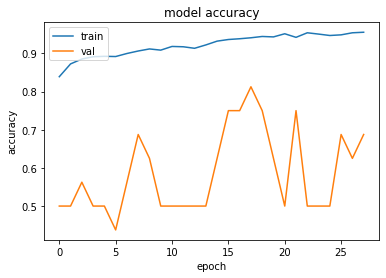

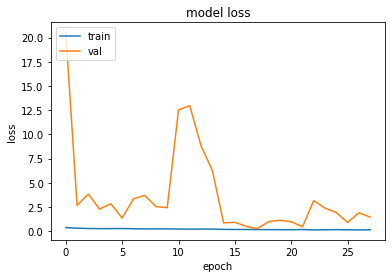

In [ ]:
#Analyze My model.
plt.plot(my_history.history['accuracy'])
plt.plot(my_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(my_history.history['loss'])
plt.plot(my_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Evaluate the model

In [ ]:
My_result = My_model.evaluate(train)

print('Train Loss:', My_result[0])
print('Train Accuracy:', My_result[1])

My_result = My_model.evaluate(test)

print('Test Loss:', My_result[0])
print('Test Accuracy:', My_result[1])

163/163 [==============================] - 115s 704ms/step - loss: 0.2002 - accuracy: 0.9193 - precision: 0.9081
Train Loss: 0.200150266289711
Train Accuracy: 0.9192867875099182
312/312 [==============================] - 8s 25ms/step - loss: 0.5163 - accuracy: 0.8654 - precision: 0.8326
Test Loss: 0.5162855386734009
Test Accuracy: 0.8653846383094788


Save the model

In [ ]:
My_model.save('saved_model/my_model.h5') 

# Transfer learning 2

Building the model

In [ ]:
# Due to the limitaion of Gpu, I used a pre trained model.
transfer_model_2 = tf.keras.applications.ResNet50V2(weights= 'imagenet',
                                         include_top=False,
                                         input_shape=(224,224,3))

for layer in transfer_model_2.layers:
    layer.trainable=False

x = transfer_model_2.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)

pred = tf.keras.layers.Dense(1, activation='sigmoid')(x)
transfer_model_2 = tf.keras.Model(inputs=transfer_model_2.input, outputs=pred)

94668760/94668760 [==============================] - 3s 0us/step


Compile

In [ ]:
transfer_model_2.compile(loss='binary_crossentropy',
              optimizer='adam', metrics = ['accuracy', Precision()])

Fit

In [ ]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                      patience=10)
lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                          patience=8)
transfer_history_2 = transfer_model_2.fit(train, epochs=30,
                       validation_data = val,
                       steps_per_epoch=110,
                       callbacks=[es, lr],
                       batch_size=32)

Epoch 1/30
110/110 [==============================] - 89s 714ms/step - loss: 0.2995 - accuracy: 0.8770 - precision_1: 0.9019 - val_loss: 0.6138 - val_accuracy: 0.6875 - val_precision_1: 0.6154 - lr: 0.0010
Epoch 2/30
110/110 [==============================] - 77s 699ms/step - loss: 0.1733 - accuracy: 0.9278 - precision_1: 0.9482 - val_loss: 0.6421 - val_accuracy: 0.7500 - val_precision_1: 0.6667 - lr: 0.0010
Epoch 3/30
110/110 [==============================] - 77s 699ms/step - loss: 0.1522 - accuracy: 0.9403 - precision_1: 0.9584 - val_loss: 1.0435 - val_accuracy: 0.6250 - val_precision_1: 0.5714 - lr: 0.0010
Epoch 4/30
110/110 [==============================] - 77s 698ms/step - loss: 0.1432 - accuracy: 0.9452 - precision_1: 0.9598 - val_loss: 0.5310 - val_accuracy: 0.8125 - val_precision_1: 0.7273 - lr: 0.0010
Epoch 5/30
110/110 [==============================] - 76s 691ms/step - loss: 0.1451 - accuracy: 0.9435 - precision_1: 0.9620 - val_loss: 0.6606 - val_accuracy: 0.6875 - val_pre

Analyze the model

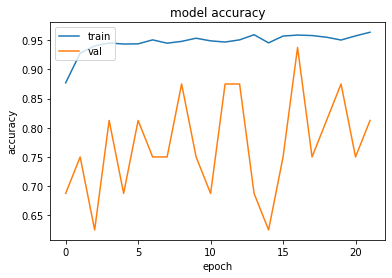

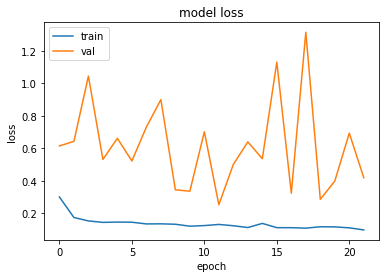

In [ ]:
#Analyze transfer model.
plt.plot(transfer_history_2.history['accuracy'])
plt.plot(transfer_history_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(transfer_history_2.history['loss'])
plt.plot(transfer_history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Evaluate transfer model

In [ ]:
transfer_result_2 = transfer_model_2.evaluate(train)

print('Train Loss:', transfer_result_2[0])
print('Train Accuracy:', transfer_result_2[1])

transfer_result_2 = transfer_model_2.evaluate(test)

print('Test Loss:', transfer_result_2[0])
print('Test Accuracy:', transfer_result_2[1])

163/163 [==============================] - 114s 699ms/step - loss: 0.0933 - accuracy: 0.9653 - precision_1: 0.9792
Train Loss: 0.09328610450029373
Train Accuracy: 0.9652990698814392
312/312 [==============================] - 8s 25ms/step - loss: 0.2175 - accuracy: 0.9199 - precision_1: 0.9271
Test Loss: 0.2175418585538864
Test Accuracy: 0.9198718070983887


Save the model

In [ ]:
transfer_model_2.save('saved_model/transfer_model_2.h5') 

# Compare Models

Here i'm going to compare models that i implemented in previous sections.

In [ ]:
# My model --> Model1
# ResNet50V2(transfer learning 2) --> Model2

def df_style(val):
    return 'background-color: green'

rows = ['Mode1', 'Model2']
columns = ['Loss', 'Accuracy', 'Precision']
Final_result = pd.DataFrame([My_result, transfer_result_2],
                            index = rows, columns = columns)

last_row = pd.IndexSlice[Final_result.index[Final_result.index == "Model2"], :]
Result = Final_result.style.applymap(df_style, subset=last_row)
display(Result)

,Loss,Accuracy,Precision
Mode1,0.516286,0.865385,0.832609
Model2,0.217542,0.919872,0.927136


So the result shows that with transfer learning, model improved.

# Data balancing

If we have imbalanced classes like here,
We can do some tricks and here i'm doing data augmentaion for the 
class that has less samples.

This technique used to increase the amount of data by adding
slightly modified copies of already existing data or newly 
created data from existing data.
We can do some changes on an image and add it to dataset.
This changes can be Geometric transformations , Kernel filters,
Mixing/merging images or Color space transformations.

Here I use two transform(horizontal flip & equalize).

 horizontal flip --> flip image horizontaly.
 
 equalize --> this augmentation enhances image contrast.

Ps.
Data augmentation is also used for prevent overfitteing.
We can use this technique before training and also during training.
I augmented during training using ImageDataGenerator in keras.

In [ ]:
input_path = '/content/chest-xray-pneumonia/chest_xray'
for _set in ['train']:
    n_normal = os.listdir(input_path + '/'+ _set + '/NORMAL')
    n_pneumonia = os.listdir(input_path + '/'+_set + '/PNEUMONIA')
print('Samples in class NORMAL: ',len(n_normal))
print('Samples in class PNEUMONIA: ',len(n_pneumonia))
print('So Dataset is imbalenced')

Samples in class NORMAL:  1341
Samples in class PNEUMONIA:  3875
So Dataset is imbalenced


In [ ]:
normal_directory="/content/chest-xray-pneumonia/chest_xray/train/NORMAL"

input_path = '/content/chest-xray-pneumonia/chest_xray'
for _set in ['train']:
    n_normal = os.listdir(input_path + '/'+ _set + '/NORMAL')
    n_pneumonia = os.listdir(input_path + '/'+_set + '/PNEUMONIA')
print('Before Augmentation')
print('Samples in class NORMAL: ',len(n_normal))
print('Samples in class PNEUMONIA: ',len(n_pneumonia))


transform1 = T.RandomHorizontalFlip(p=1)
transform2 = T.RandomEqualize(p=1)
for filename in os.listdir(normal_directory):
    try:
        img = Image.open(normal_directory + '/' + filename)
        temp = transform1(img)
        temp.save(f'{normal_directory}/a{filename}')
    except:
        continue

i = 1
for filename in os.listdir(normal_directory):
    try:
        img = Image.open(normal_directory + '/' + filename)
        temp = transform2(img)
        temp.save(f'{normal_directory}/ba{filename}')
        i += 1
        if i > 1200:
            break
    except:
        continue

input_path = '/content/chest-xray-pneumonia/chest_xray'
for _set in ['train']:
    n_normal = os.listdir(input_path + '/'+ _set + '/NORMAL')
    n_pneumonia = os.listdir(input_path + '/'+_set + '/PNEUMONIA')
print()
print('After Augmentation')
print('Samples in class NORMAL: ',len(n_normal))
print('Samples in class PNEUMONIA: ',len(n_pneumonia))


Before Augmentation
Samples in class NORMAL:  1341
Samples in class PNEUMONIA:  3875

After Augmentation
Samples in class NORMAL:  3882
Samples in class PNEUMONIA:  3875


# Interpretation


Generally speaking, interpretability refers to the extent of human’s ability to understand and reason a model.

In order for machine learning to be trusted in many applications, it is critical to be able to reliably explain why the machine learning algorithm makes certain predictions.
Therefore having interpretations for why certain predictions are made is critical for establishing trust and transparency between users and the algorithm.

Take the pathology predictor; an interpretation method might suggest that a particular section in an image is important for the malignant classification.

We can summarize the implications of interpretability in different levels:

*Simulatability is considered as the understanding over the entire model.

*Decomposability is to understand a model in terms of its components such as neurons, layers, blocks, and so on.

*Algorithmic Transparency is to understand the training process and dynamics of a model.

I'm going to use Integrated Gradients(IG) for interpretation.

This method computes which features are important to a neural network when making a prediction on a particular data point. This helps users understand which features their network relies on.

Integrated Gradients is a feature attribution method.

Given a target input x and a network function f, feature atribution methods assign an importance score P^(i) (f,x) to the ith feature value representing how much that feature adds or subtracts from the network output.
A larg positive or negative P^(i) (f,x) indicates that feature storngly increases or decreases the network output f(x) respectively, while an importance score close to zero indicates that feature in question did not influence f(x).

Positive attributions are attributions that influenced the model to make the decision it did and Negative attributions are attributions that influenced the model against making the decision that it eventually did.


Integrated Gradients gets importance scores by accumulating gradients on images interpolated between the baseline value and the current input.

To compute IG, we do below steps:

Identify the input and the output.

Compute which features are important to a neural network when making a prediction on a particular data point. To identify these features, we need to choose a baseline input. A baseline input can be a black image or random noise.

Interpolate the baseline for a given number of steps.

Preprocess these interpolated images and do a forward pass.

Get the gradients for these interpolated images.

Approximate the gradients integral using the trapezoidal rule(a technique for approximating the definite integral).

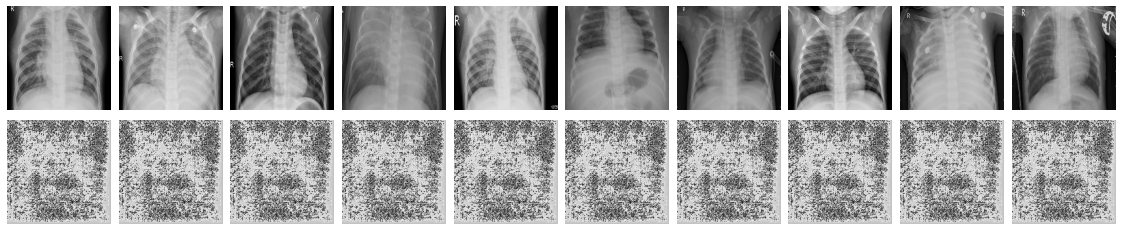

In [59]:
path = "/content/chest-xray-pneumonia/chest_xray/train/PNEUMONIA"

fig = plt.figure(figsize=(20, 4))
rows = 2
columns = 10

for i in range(10):
    filename = random.choice(os.listdir(path))  
    img = tf.keras.preprocessing.image.load_img(f'{path}/{filename}',
                                              target_size=(224, 224))

    fig.add_subplot(rows, columns, i + 1)
    plt.imshow(img)
    plt.axis('off')

    img = tf.keras.preprocessing.image.img_to_array(img)
    data = ([img], None)
    explainer = IntegratedGradients()
    grid = explainer.explain(data, transfer_model_2, class_index=0) 

    fig.add_subplot(rows, columns, i + 11)
    plt.imshow(grid, cmap = 'gray')
    plt.axis('off')

plt.subplots_adjust(hspace=0.1, wspace=0)
plt.show()

# Resources

For interpretation part, I used two link below:

https://keras.io/examples/vision/integrated_gradients/

https://distill.pub/2020/attribution-baselines/